# Projeto: Previsão de Preços em Nova York

## Introdução
Este notebook aborda a análise exploratória e modelagem preditiva para prever preços de aluguéis temporários em Nova York. Ele contém:
- Análise exploratória (EDA)
- Processamento de dados
- Treinamento do modelo
- Avaliação do modelo
- Aplicação do modelo em um exemplo específico


# Sobre os Dados

Os dados utilizados neste projeto incluem informações detalhadas sobre aluguéis temporários em Nova York, como preço, tipo de acomodação, localização, e características do anfitrião. Além de dados externos extraídos posteriormente.

### Dicionário de Dados
1. **id**: Identificador único do anúncio.
2. **nome**: Nome do anúncio.
3. **host_id**: Identificador único do anfitrião.
4. **host_name**: Nome do anfitrião.
5. **bairro_group**: Grupo de bairros (ex.: Manhattan, Brooklyn).
6. **bairro**: Nome do bairro específico.
7. **latitude**: Coordenada geográfica (latitude).
8. **longitude**: Coordenada geográfica (longitude).
9. **room_type**: Tipo de acomodação (casa inteira, quarto privado, etc.).
10. **price**: Preço por noite.
11. **minimo_noites**: Número mínimo de noites para reserva.
12. **numero_de_reviews**: Número total de avaliações.
13. **ultima_review**: Data da última avaliação.
14. **reviews_por_mes**: Avaliações recebidas por mês.
15. **calculado_host_listings_count**: Número de anúncios do anfitrião.
16. **disponibilidade_365**: Número de dias disponíveis no ano.

# **Análise Exploratória de Dados (EDA)**

Avaliar o conjunto de dados de forma macro para compreender os dados

In [1]:
#Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

In [2]:
#Carregando o dataset
df=pd.read_csv('data/raw/teste_indicium_precificacao.csv')

In [3]:
#Verificando as primeiras linhas do dataset
df.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75,-73.98,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.81,-73.94,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.69,-73.96,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.80,-73.94,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.75,-73.97,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [4]:
#Verificando as ultimas linhas do dataset
df.tail()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
48889,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.68,-73.95,Private room,70,2,0,NaN,NaN,2,9
48890,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70,-73.93,Private room,40,4,0,NaN,NaN,2,36
48891,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81,-73.95,Entire home/apt,115,10,0,NaN,NaN,1,27
48892,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.76,-73.99,Shared room,55,1,0,NaN,NaN,6,2
48893,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76,-73.99,Private room,90,7,0,NaN,NaN,1,23


In [5]:
#Verificando a dimensão do arquivo
df.shape

(48894, 16)

In [6]:
#Verificando informações do arquivo
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

Verificar Se Existe Valores Nulos (Em Branco) Nos Dados

In [7]:
#Verificando a quantidade de valores nulos
df.isnull().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

Tratamento de Nulos

In [8]:
df["ultima_review"] = pd.to_datetime(df.ultima_review)

In [9]:
df.loc[df['numero_de_reviews'] == 0, 'reviews_por_mes'] = df.loc[df['numero_de_reviews'] == 0, 'reviews_por_mes'].fillna(0)
df.tail()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
48889,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.68,-73.95,Private room,70,2,0,NaT,0.00,2,9
48890,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70,-73.93,Private room,40,4,0,NaT,0.00,2,36
48891,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81,-73.95,Entire home/apt,115,10,0,NaT,0.00,1,27
48892,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.76,-73.99,Shared room,55,1,0,NaT,0.00,6,2
48893,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76,-73.99,Private room,90,7,0,NaT,0.00,1,23


In [10]:
df.ultima_review.fillna(method="ffill", inplace=True)
df.tail()

C:\Users\pedro\AppData\Local\Temp\ipykernel_11924\1209778178.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.ultima_review.fillna(method="ffill", inplace=True)
C:\Users\pedro\AppData\Local\Temp\ipykernel_11924\1209778178.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.ultima_review.fillna(method="ffill", inplace=True)


,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
48889,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.68,-73.95,Private room,70,2,0,2019-07-08,0.00,2,9
48890,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70,-73.93,Private room,40,4,0,2019-07-08,0.00,2,36
48891,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81,-73.95,Entire home/apt,115,10,0,2019-07-08,0.00,1,27
48892,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.76,-73.99,Shared room,55,1,0,2019-07-08,0.00,6,2
48893,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76,-73.99,Private room,90,7,0,2019-07-08,0.00,1,23


In [11]:
for column in df.columns:
    if df[column].isnull().sum() != 0:
        df[column] = df[column].fillna(df[column].mode()[0])

In [12]:
#Contagem de nulos após tratamento
df.isnull().sum()


id                               0
nome                             0
host_id                          0
host_name                        0
bairro_group                     0
bairro                           0
latitude                         0
longitude                        0
room_type                        0
price                            0
minimo_noites                    0
numero_de_reviews                0
ultima_review                    0
reviews_por_mes                  0
calculado_host_listings_count    0
disponibilidade_365              0
dtype: int64

Valores Unicos de Cada Variável

In [13]:
# Total de valores únicos de cada variável

valores_unicos = []
for coluna in df.columns[:16]:
    unicos = df[coluna].nunique()
    print(f"{coluna}: {unicos}")
    valores_unicos.append(unicos)



id: 48894
nome: 47904
host_id: 37457
host_name: 11452
bairro_group: 5
bairro: 221
latitude: 19048
longitude: 14718
room_type: 3
price: 674
minimo_noites: 109
numero_de_reviews: 394
ultima_review: 1764
reviews_por_mes: 938
calculado_host_listings_count: 47
disponibilidade_365: 366


Visualizar as medidas estatisticas principais do conjunto de dados

In [14]:
# Visualizando algumas medidas estatisticas.
df.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,48894.00,48894.00,48894.00,48894.00,48894.00,48894.00,48894.00,48894,48894.00,48894.00,48894.00
mean,19017532.13,67621393.58,40.73,-73.95,152.72,7.03,23.27,2018-10-14 06:09:58.159283456,1.09,7.14,112.78
min,2595.00,2438.00,40.50,-74.24,0.00,1.00,0.00,2011-03-28 00:00:00,0.00,1.00,0.00
25%,9472370.75,7822736.75,40.69,-73.98,69.00,1.00,1.00,2018-07-31 00:00:00,0.04,1.00,0.00
50%,19677431.50,30795529.00,40.72,-73.96,106.00,3.00,5.00,2019-05-25 00:00:00,0.37,1.00,45.00
75%,29152249.25,107434423.00,40.76,-73.94,175.00,5.00,24.00,2019-06-24 00:00:00,1.58,2.00,227.00
max,36487245.00,274321313.00,40.91,-73.71,10000.00,1250.00,629.00,2019-07-08 00:00:00,58.50,327.00,365.00
std,10982884.05,78611176.15,0.05,0.05,240.16,20.51,44.55,NaN,1.60,32.95,131.62


In [15]:
df.describe(include=['object'])

,nome,host_name,bairro_group,bairro,room_type
count,48894,48894,48894,48894,48894
unique,47904,11452,5,221,3
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt
freq,34,438,21661,3920,25409


Adição de features com dados reais externos ao DataSet Extraidos do site https://a816-dohbesp.nyc.gov/IndicatorPublic/

In [16]:
#Rent-burdened households
#Rent burden is spending 30% or more of your income on rent and utilities.
rent_burden = {
    'Bronx': 57.2,  
    'Brooklyn': 50.1,
    'Manhattan': 43.6,
    'Queens': 50.1,
    'Staten Island': 48.8
}


In [17]:
df['rent_burden'] = df['bairro_group'].map(rent_burden)

In [18]:
#Evictions (court-ordered)
#Eviction often leads to residential instability, moving into poor quality housing, overcrowding, and homelessness, all of which is associated with negative health among adults and children.People who are threatened with eviction, even before they lose their home, are more likely to report poor health, high blood pressure, depression (from "The Hidden Health Crisis of Eviction" by Allison Bovell-Ammo and Megan Sandel).
evictions = {
    'Bronx': 1.001,  
    'Brooklyn': 899,
    'Manhattan': 406,
    'Queens': 617,
    'Staten Island': 103
}

In [19]:
df['evictions'] = df['bairro_group'].map(evictions)

In [20]:
# Criar indicador de luxo
df['luxury_indicator'] = df.apply(lambda x: 1 if x['bairro_group'] in ['Manhattan', 'Brooklyn'] and x['room_type'] == 'Entire home/apt' else 0, axis=1)


In [21]:
# Taxa de ocupação (dias disponíveis / 365)
df['occupancy_rate'] = df['disponibilidade_365'] / 365


In [22]:
#Densidade populacional
population_density = {
    'Manhattan': 28.872, 
    'Brooklyn': 15.227,
    'Queens': 8.542,
    'Bronx': 13.482,
    'Staten Island': 3.327
}

In [23]:
df['population_density'] = df['bairro_group'].map(population_density)

In [24]:
from geopy.distance import geodesic

#Coordenada central de Manhattan (Times Square)
manhattan_center = (40.758896, -73.985130)

#Calcular distância de cada imóvel ao centro de Manhattan
df['distance_to_manhattan_center'] = df.apply(lambda x: geodesic((x['latitude'], x['longitude']), manhattan_center).kilometers, axis=1)


In [25]:
# densidade x disponibilidade
df['density_availability'] = df['population_density'] * df['disponibilidade_365']

# densidade x tipo de quarto
df['density_luxury'] = df['population_density'] * df['luxury_indicator']

# densidade x distância ao centro
df['density_proximity'] = df['population_density'] / df['distance_to_manhattan_center']

Verificar os valores únicos em cada variavel

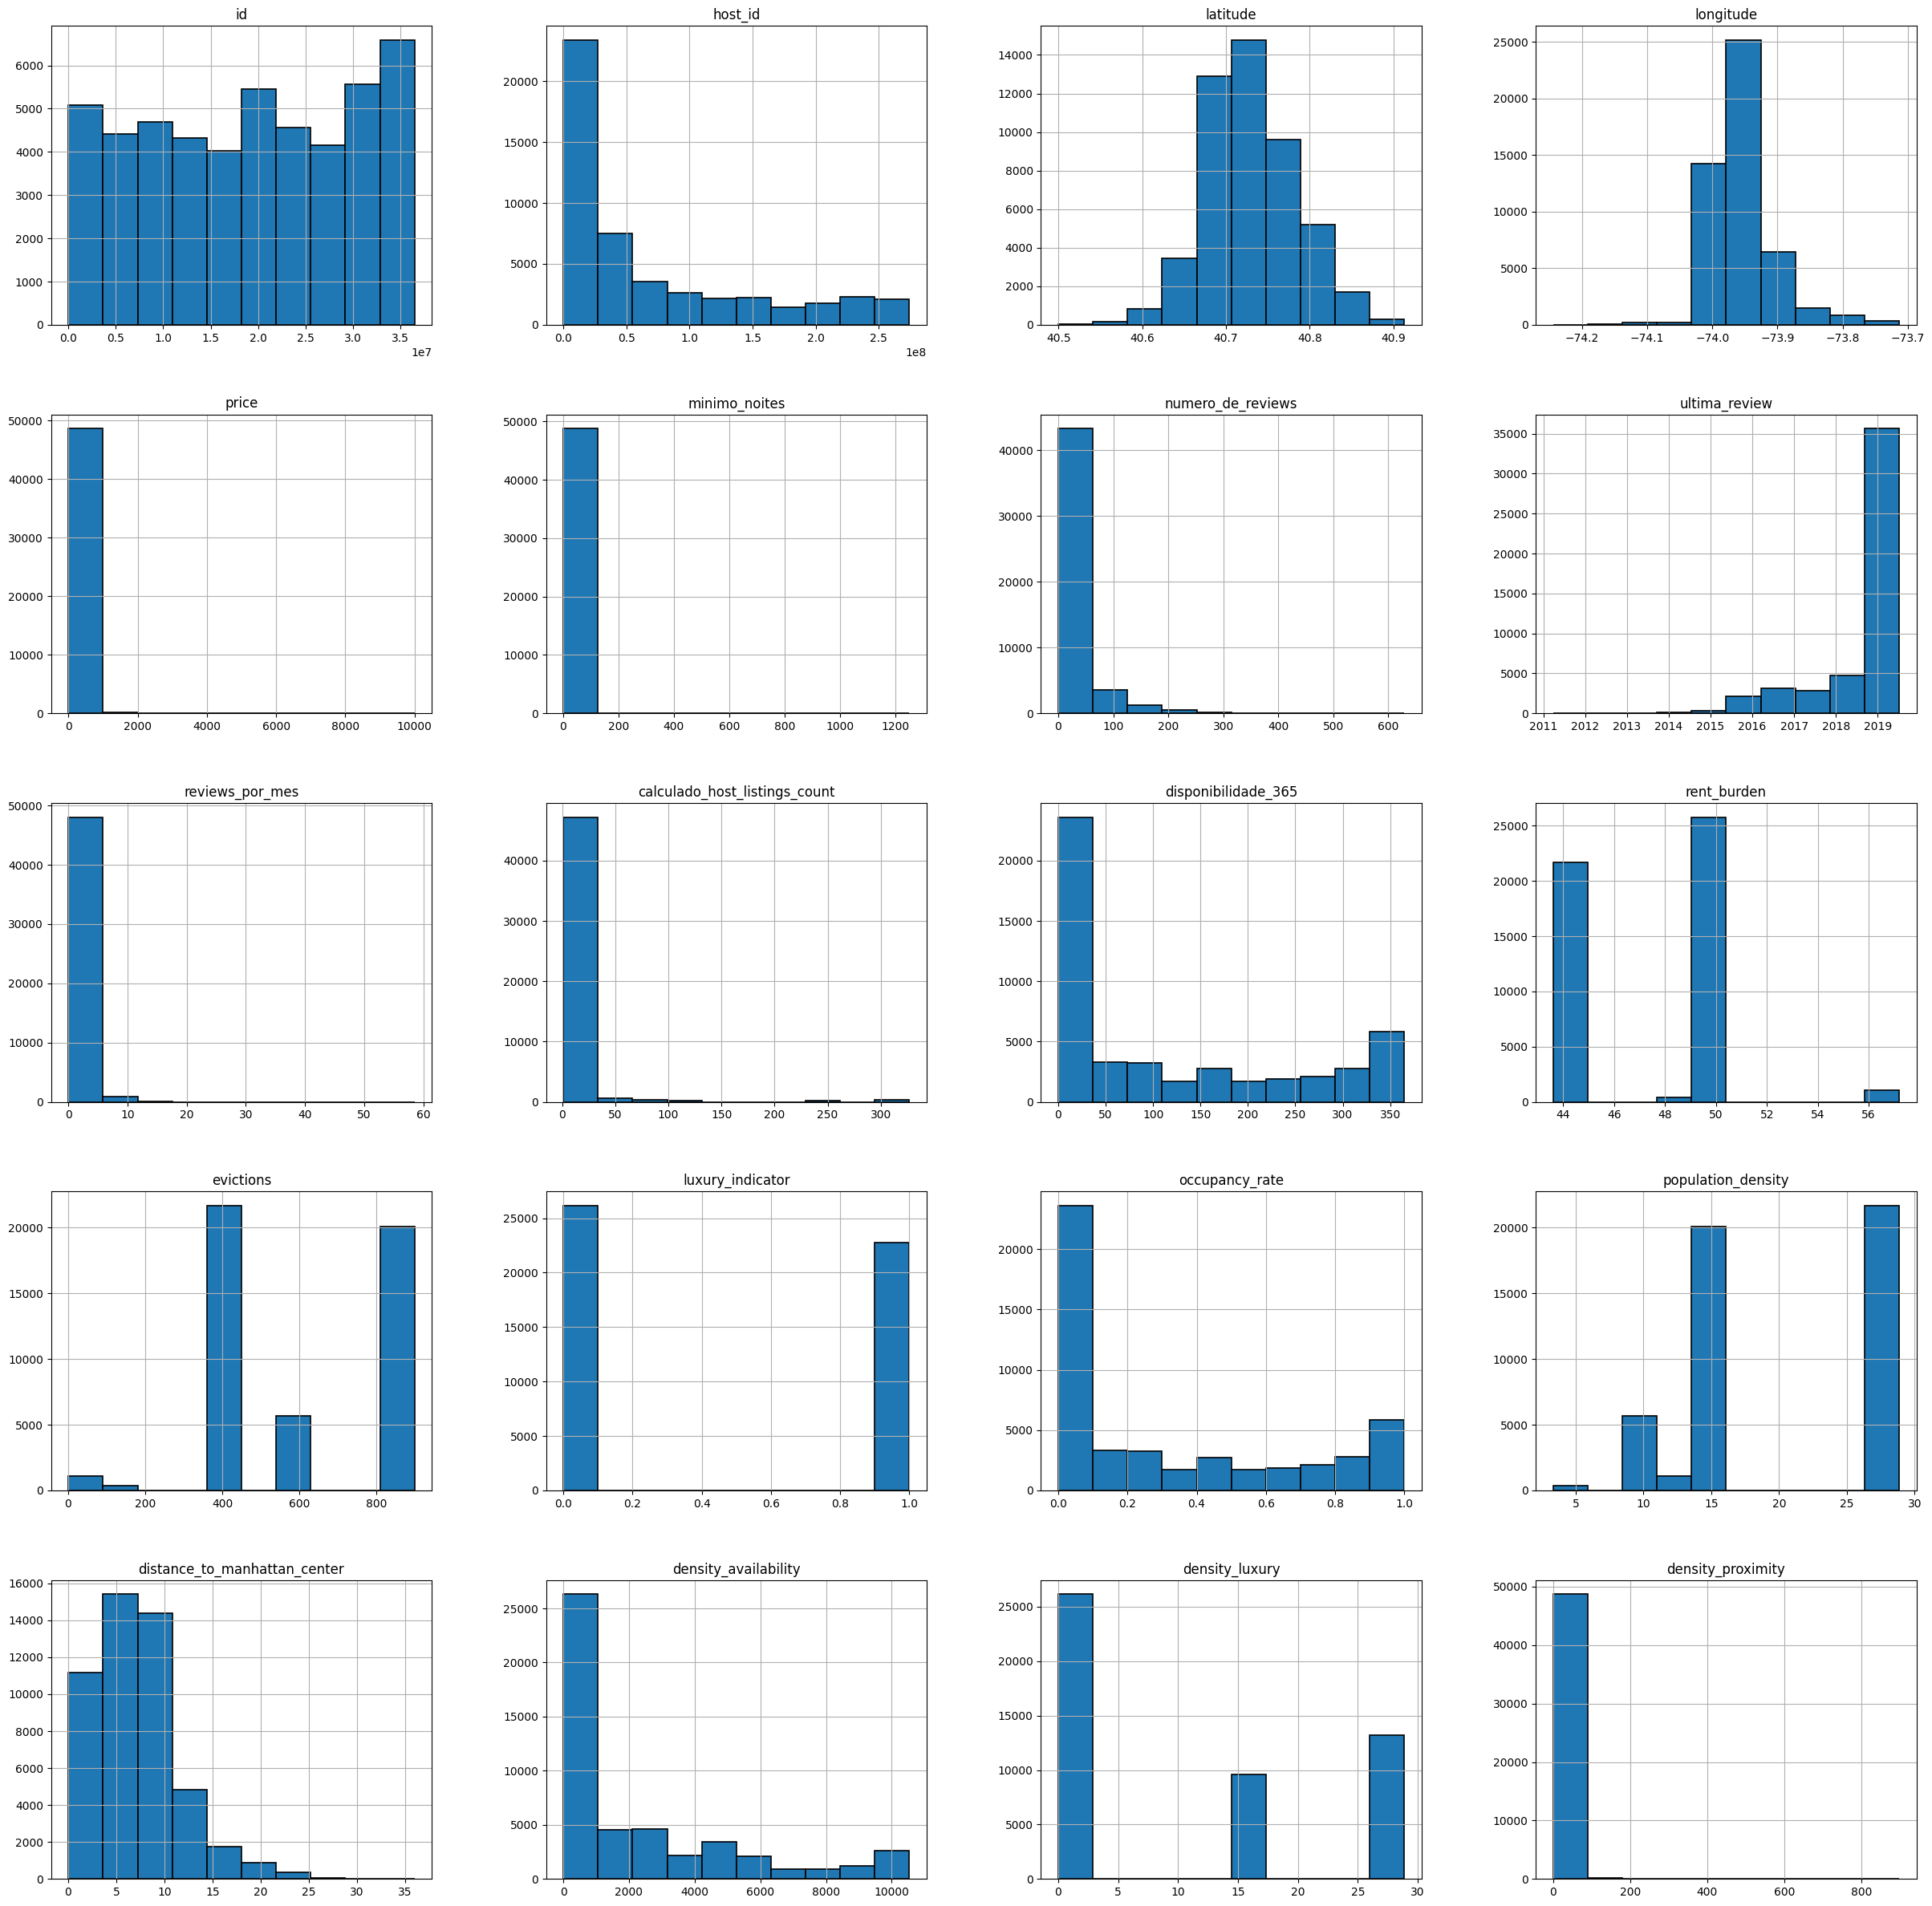

In [26]:
df.hist(edgecolor="black", linewidth=1.2, figsize=(30, 30));


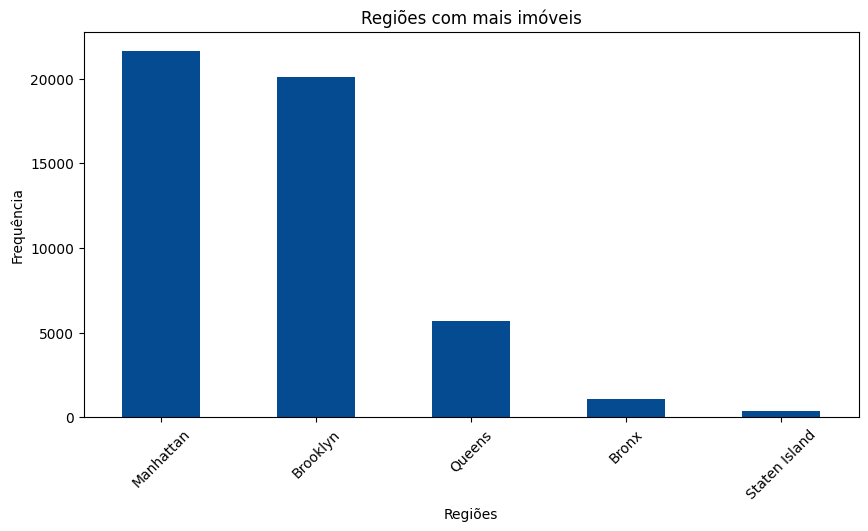

In [27]:
df['bairro_group'].value_counts().plot(kind='bar', color='#044b91', figsize=(10,5))
plt.title('Regiões com mais imóveis')
plt.xlabel('Regiões')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()

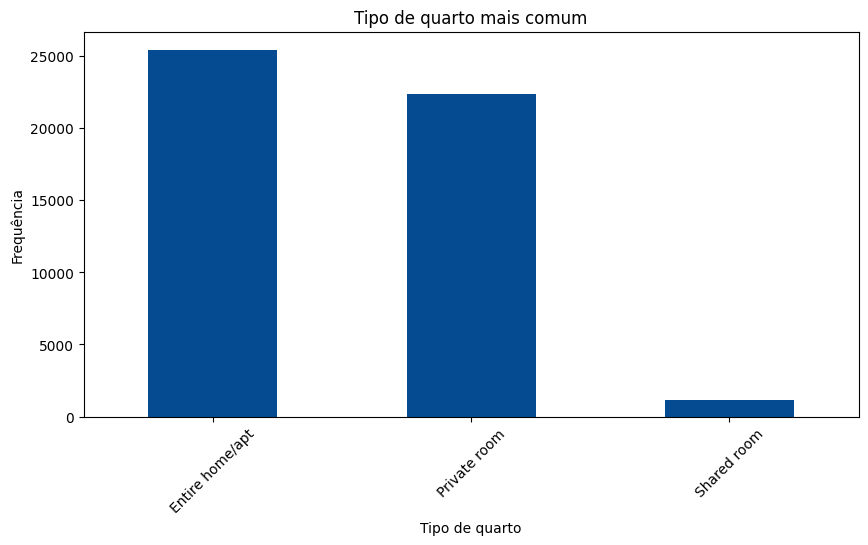

In [28]:
df['room_type'].value_counts().plot(kind='bar', color='#044b91', figsize=(10,5))
plt.title('Tipo de quarto mais comum')
plt.xlabel('Tipo de quarto')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()

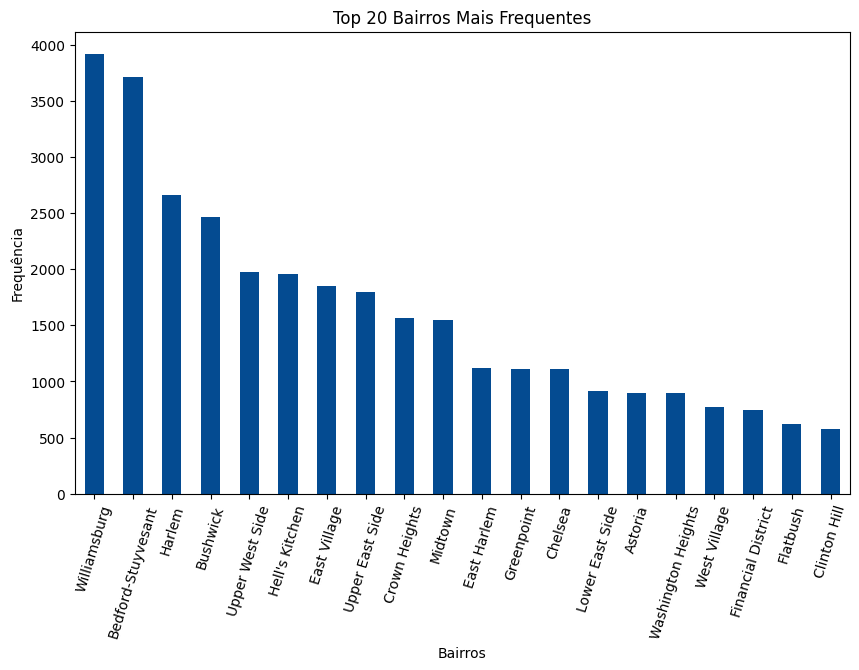

In [29]:
import matplotlib.pyplot as plt

frequencias = df['bairro'].value_counts()
top = frequencias.head(20)


top.plot(kind='bar', figsize=(10, 6), color='#044b91')
plt.title('Top 20 Bairros Mais Frequentes')
plt.xlabel('Bairros')
plt.ylabel('Frequência')
plt.xticks(rotation=73)
plt.show()


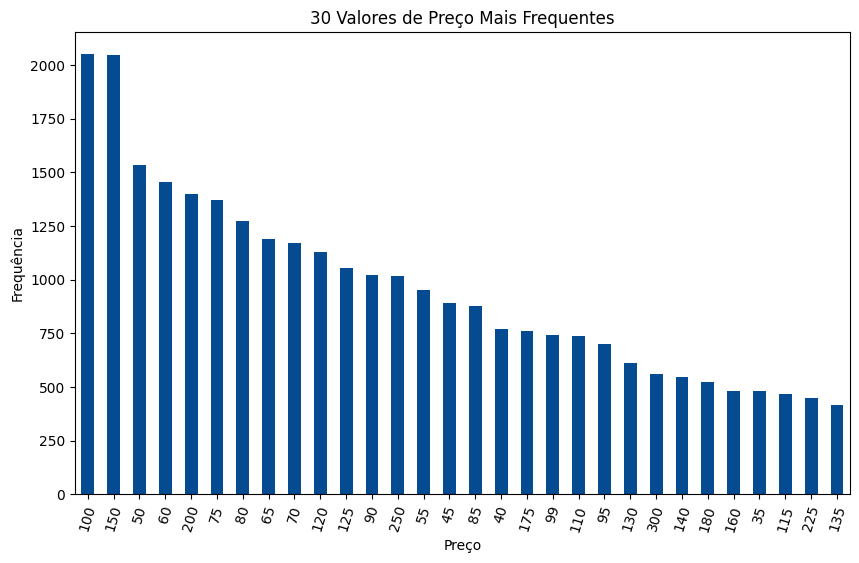

In [30]:
frequencias_price = df['price'].value_counts()
top = frequencias_price.head(30)


top.plot(kind='bar', figsize=(10, 6), color='#044b91')
plt.title('30 Valores de Preço Mais Frequentes')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.xticks(rotation=73)
plt.show()

Apresentação de possíveis outliers

In [31]:
#carregar variaveis para plot
variaveis_numericas = []
for i in df.columns[0:11].tolist():
        if df.dtypes[i] == 'int64' or df.dtypes[i] == 'float64':
            variaveis_numericas.append(i)


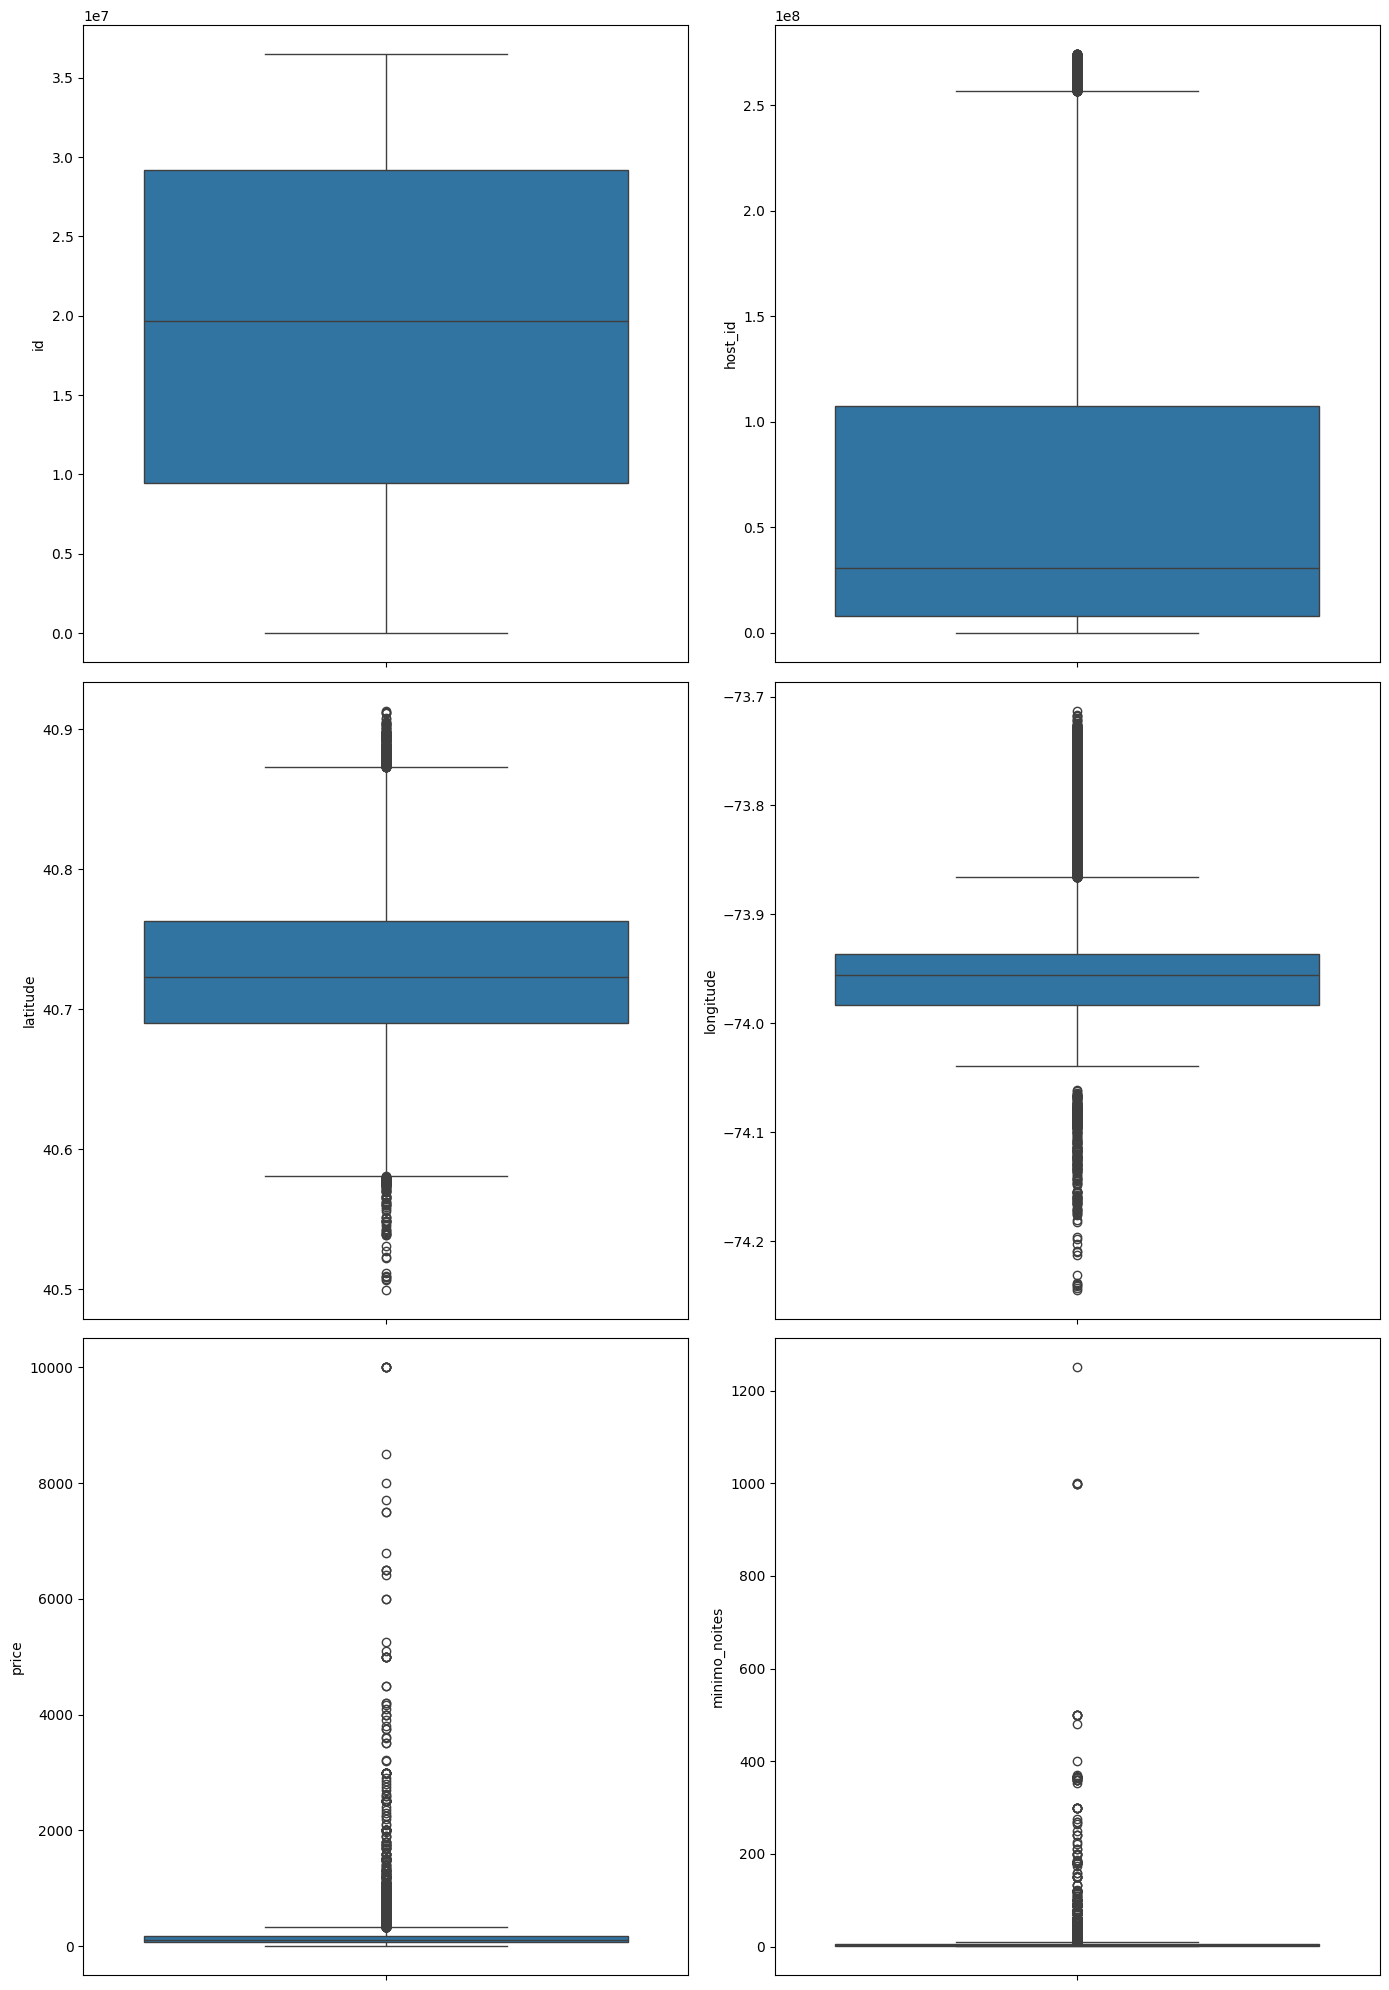

In [32]:
#Exibição de Outliers
plt.rcParams["figure.figsize"] = [14.00, 20.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(3, 2)

linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.boxplot(data = df, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0

plt.show()

Analisar a relação de cada variável x variável alvo

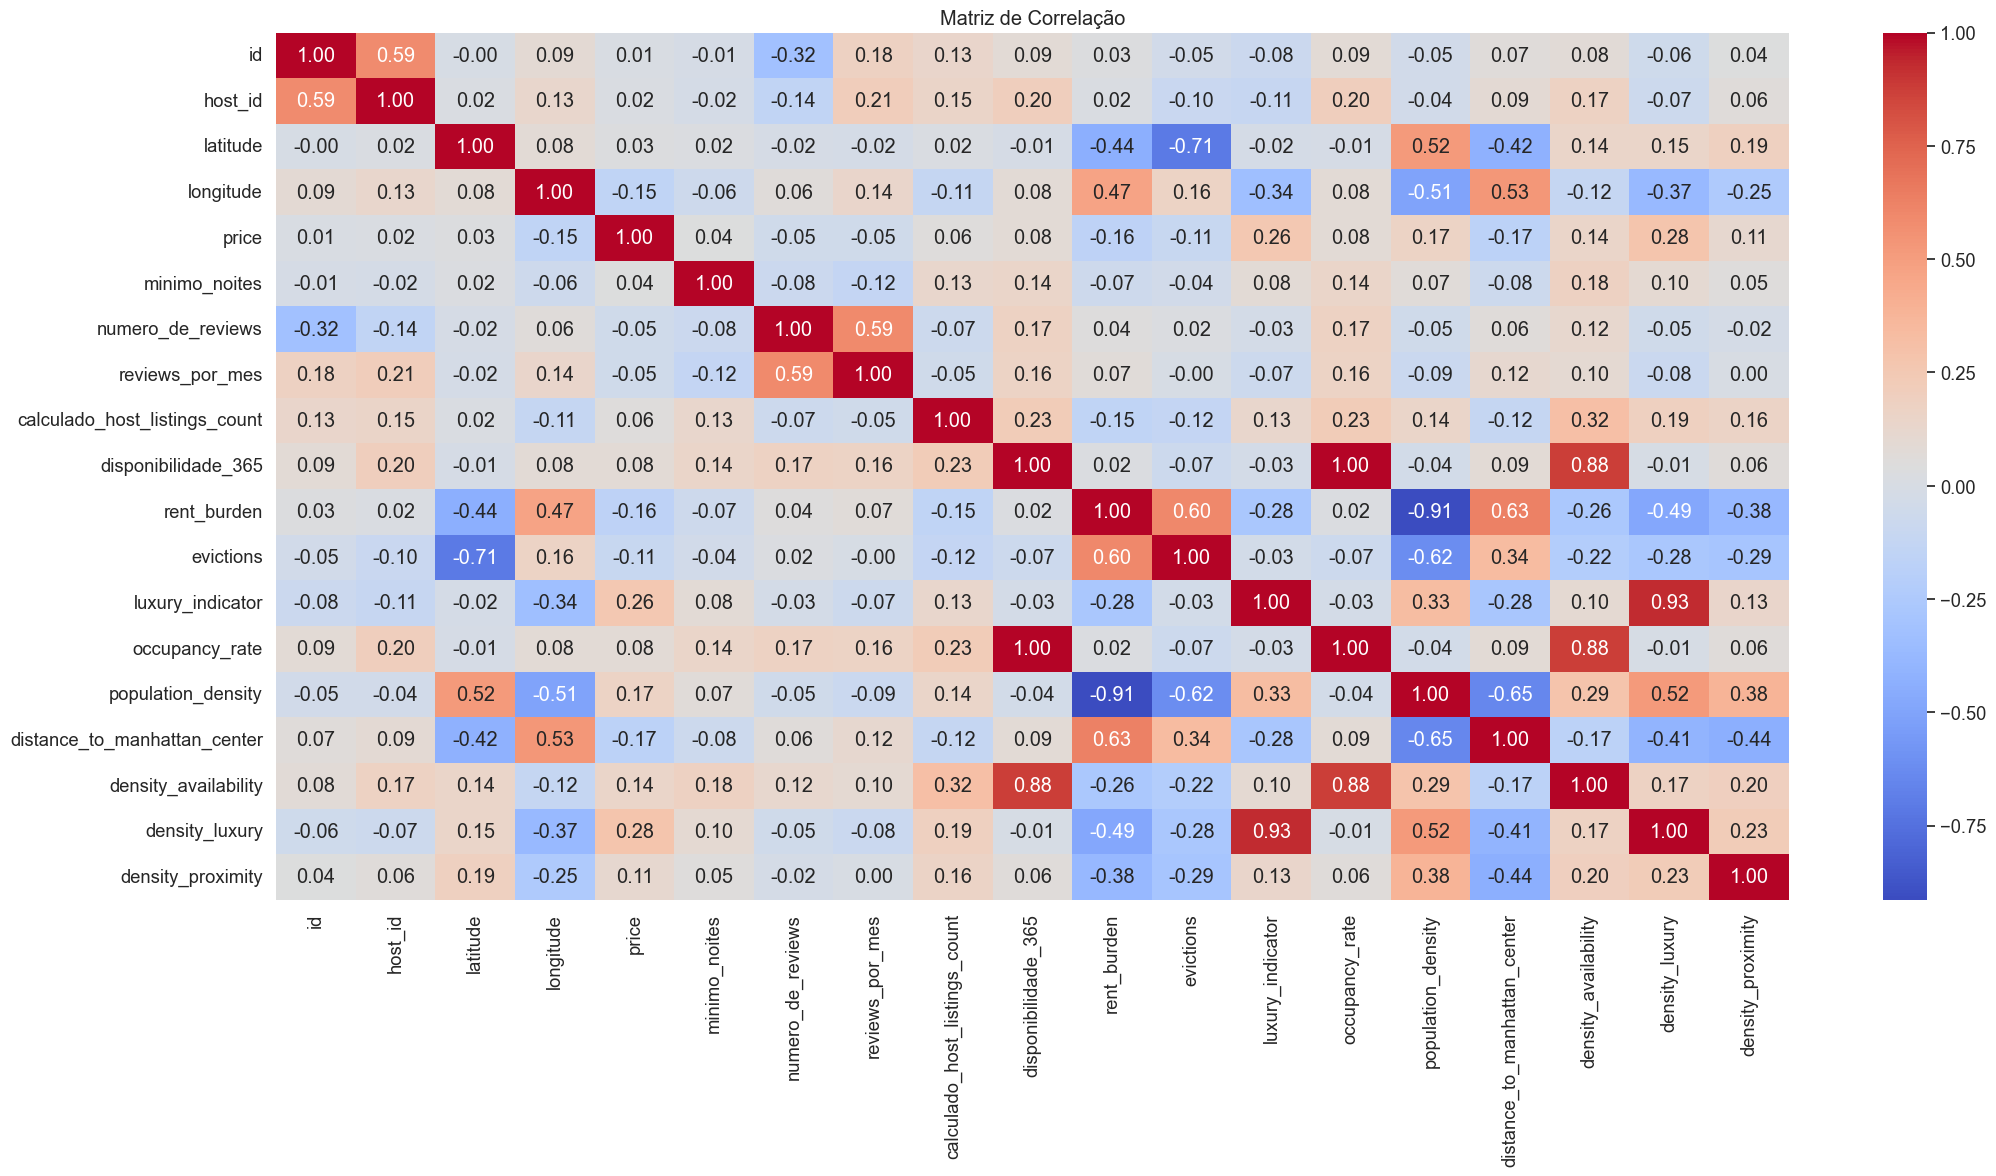

In [33]:
sns.set_theme(font_scale=1.2) 
plt.figure(figsize=(22, 12))  

numeric_df = df.select_dtypes(include=['int64', 'float64'])

sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()


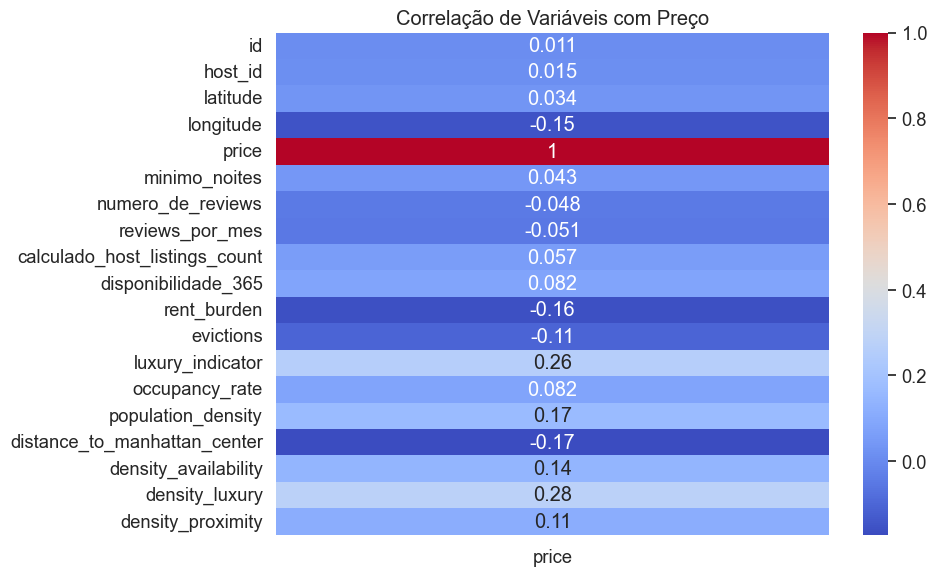

In [34]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlacoes = numeric_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlacoes[['price']], annot=True, cmap='coolwarm')
plt.title("Correlação de Variáveis com Preço")
plt.show()


<Axes: title={'center': 'Correlation with Price'}>

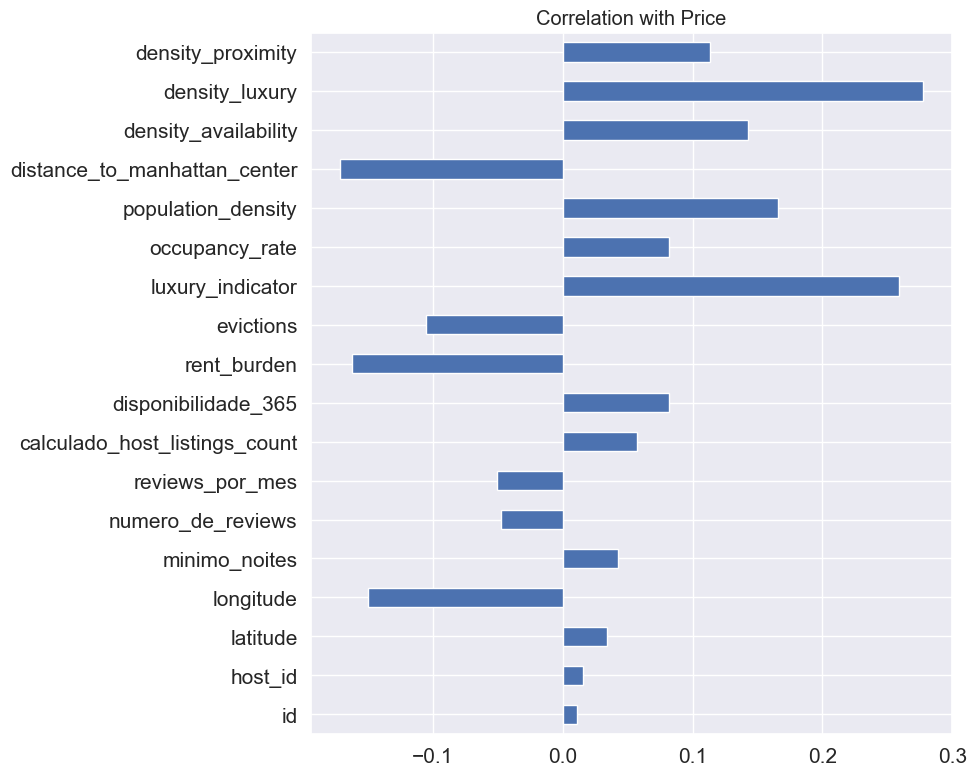

In [35]:
numeric_df.drop('price', axis=1).corrwith(numeric_df.price).plot.barh(figsize=(10, 8), 
                                                        title='Correlation with Price',
                                                        fontsize=15, grid=True)

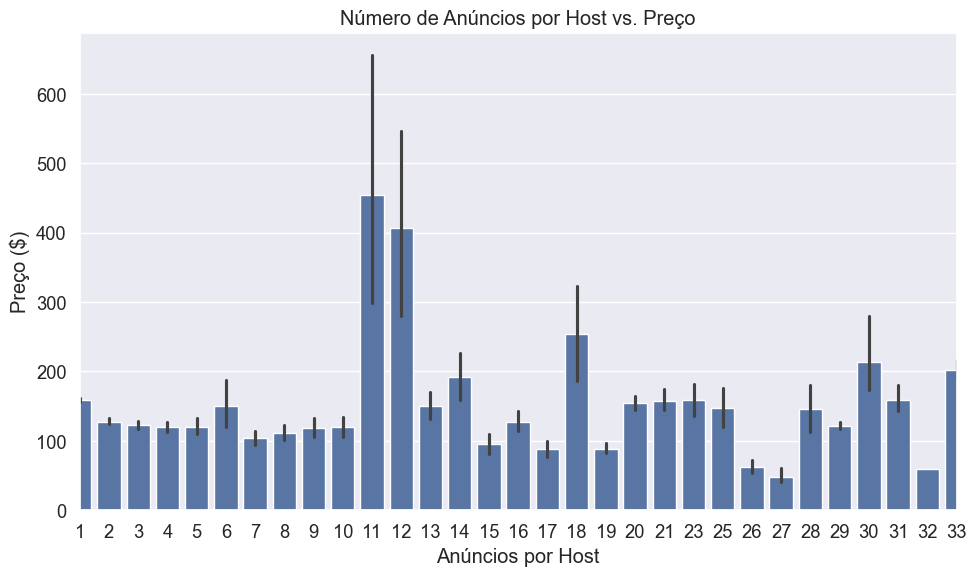

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='calculado_host_listings_count', y='price')
plt.title("Número de Anúncios por Host vs. Preço")
plt.xlabel("Anúncios por Host")
plt.ylabel("Preço ($)")
#plt.ylim(0, 500)  
plt.xlim(0, 30) 
plt.show()


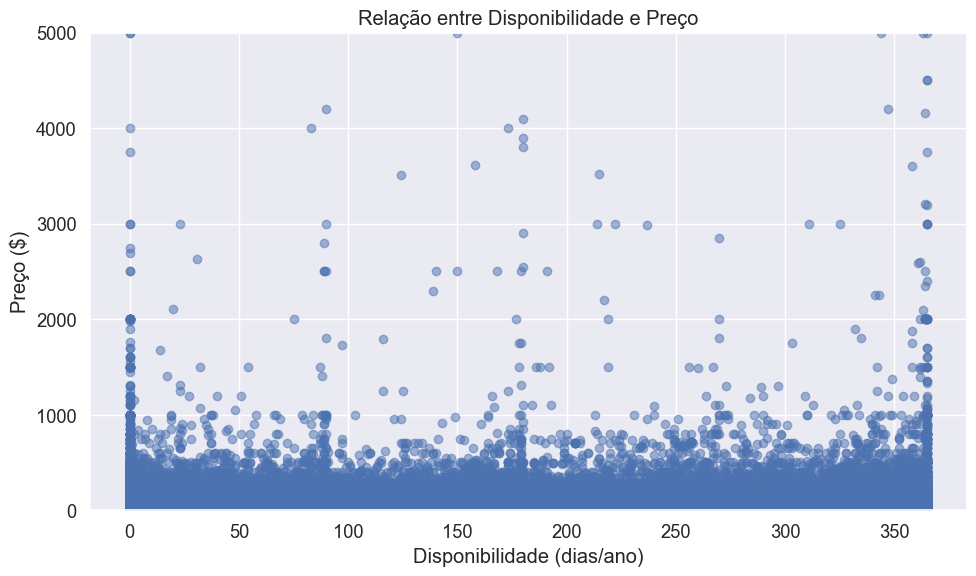

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(df['disponibilidade_365'], df['price'], alpha=0.5)
plt.title("Relação entre Disponibilidade e Preço")
plt.xlabel("Disponibilidade (dias/ano)")
plt.ylabel("Preço ($)")
plt.ylim(0, 5000)
#plt.xlim(10, 50)
plt.show()

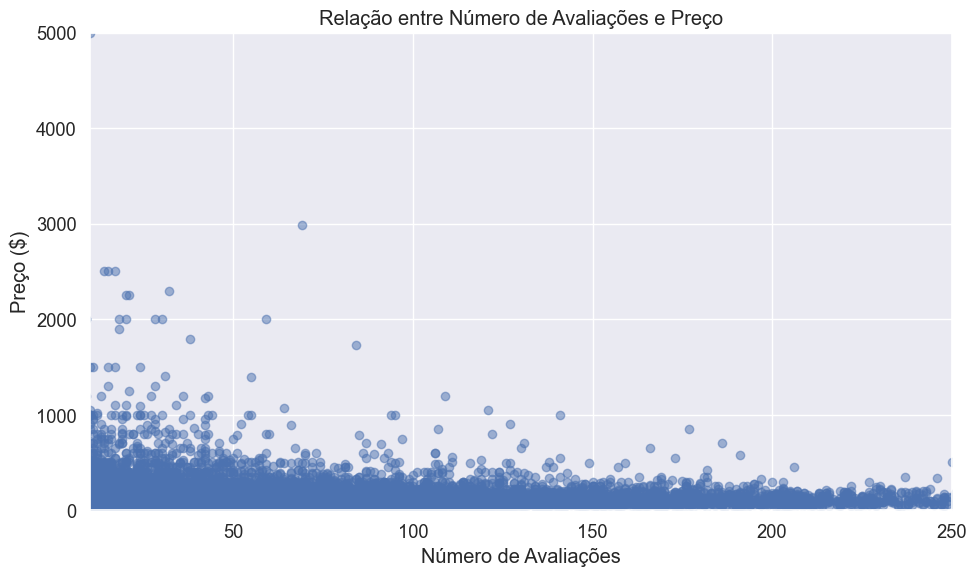

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(df['numero_de_reviews'], df['price'], alpha=0.5)
plt.title("Relação entre Número de Avaliações e Preço")
plt.xlabel("Número de Avaliações")
plt.ylabel("Preço ($)")
plt.ylim(0, 5000)  
plt.xlim(10, 250)  
plt.show()


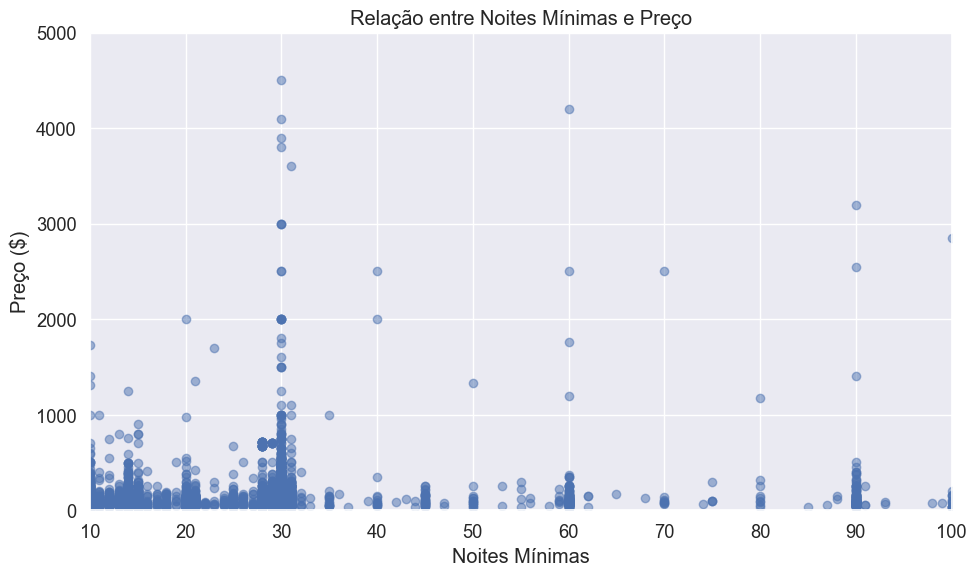

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(df['minimo_noites'], df['price'], alpha=0.5)
plt.title("Relação entre Noites Mínimas e Preço")
plt.xlabel("Noites Mínimas")
plt.ylabel("Preço ($)")
plt.ylim(0, 5000)
plt.xlim(10, 100)
plt.show()


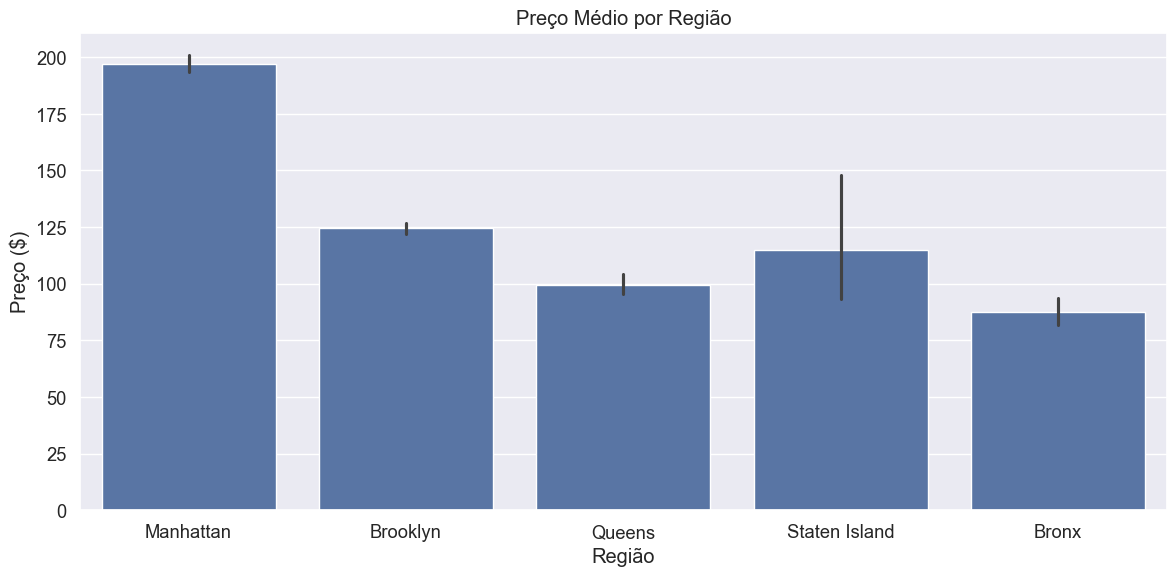

In [40]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='bairro_group', y='price')
plt.title("Preço Médio por Região")
plt.ylabel("Preço ($)")
plt.xlabel("Região")
plt.show()

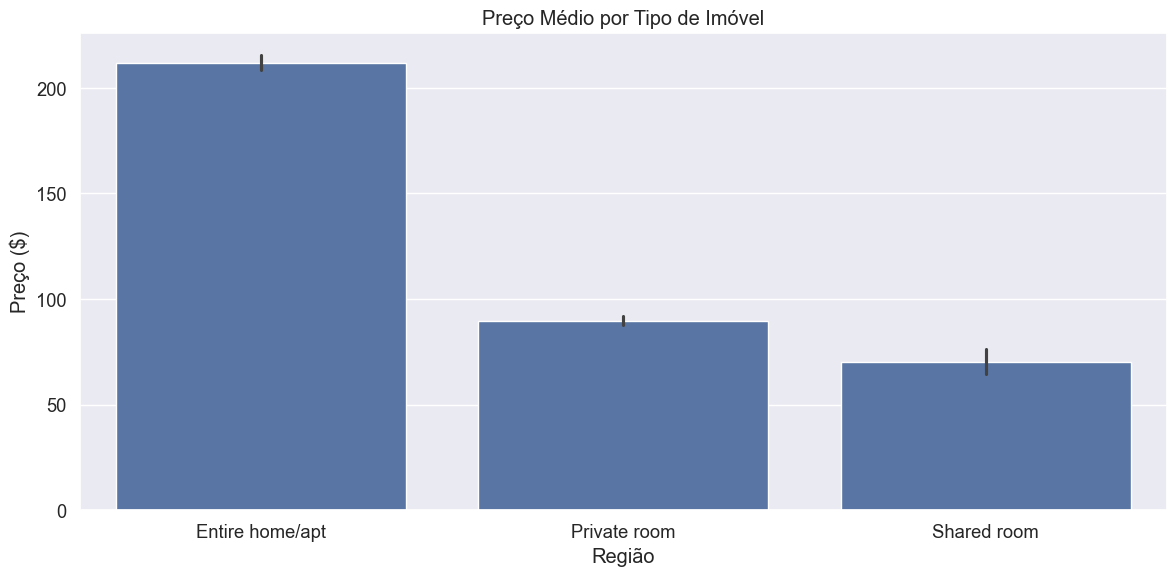

In [41]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='room_type', y='price')
plt.title("Preço Médio por Tipo de Imóvel")
plt.ylabel("Preço ($)")
plt.xlabel("Região")
plt.show()

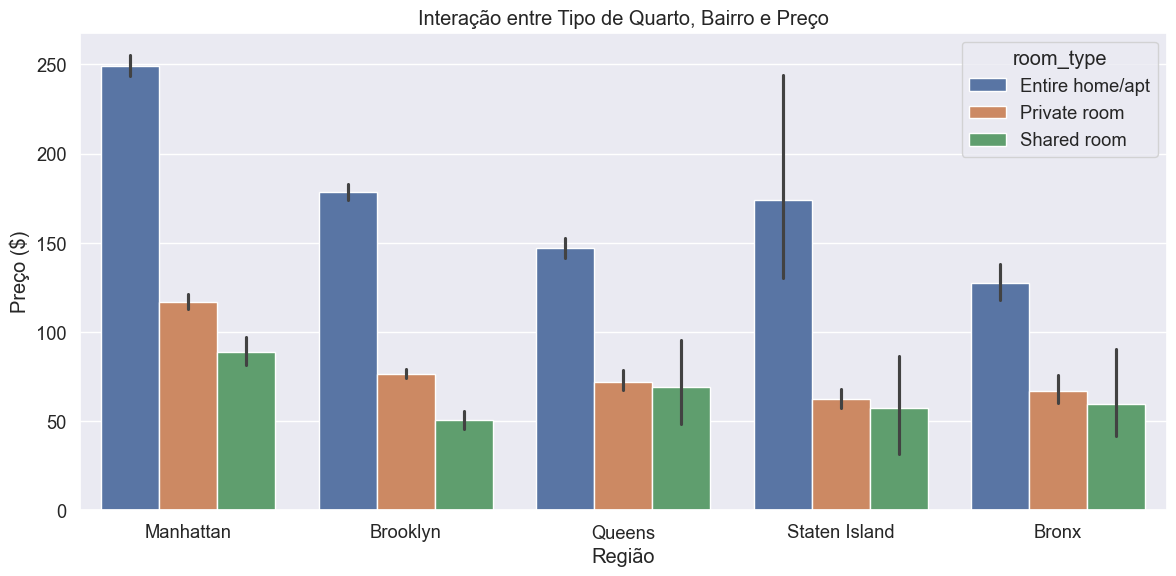

In [42]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='bairro_group', y='price', hue='room_type')
plt.title("Interação entre Tipo de Quarto, Bairro e Preço")
plt.ylabel("Preço ($)")
plt.xlabel("Região")
plt.show()

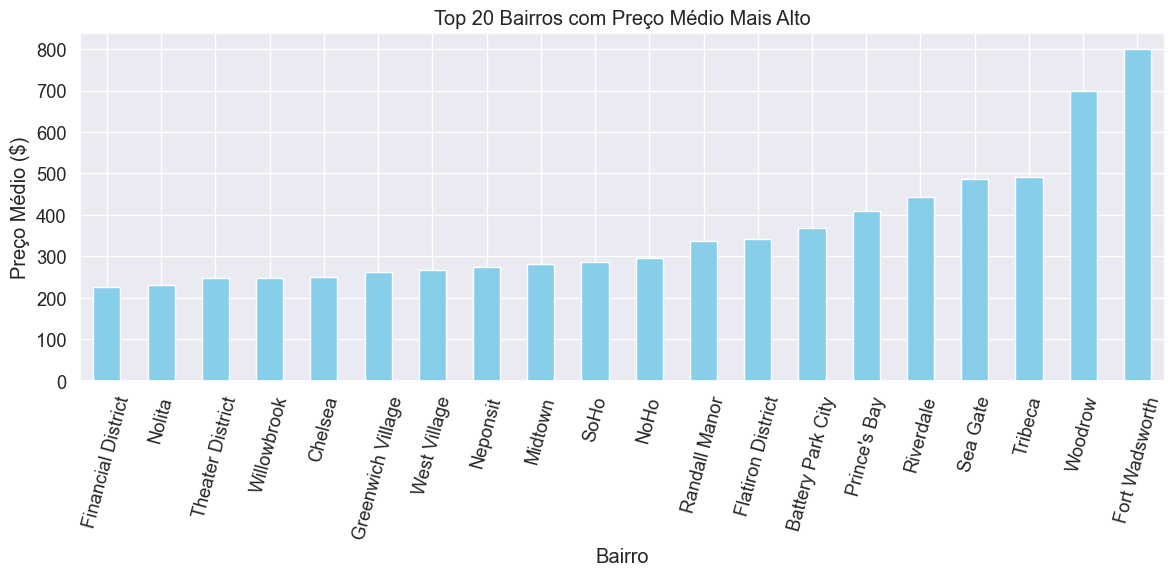

In [43]:
# Top 10 bairros mais caros
media_preco_bairro = df.groupby('bairro')['price'].mean().sort_values()
top_bairros_caros = media_preco_bairro.tail(20)  # Os últimos valores (mais caros)

plt.figure(figsize=(12, 6))
top_bairros_caros.plot(kind='bar', color='skyblue')
plt.title("Top 20 Bairros com Preço Médio Mais Alto")
plt.ylabel("Preço Médio ($)")
plt.xlabel("Bairro")
plt.xticks(rotation=75)
plt.show()


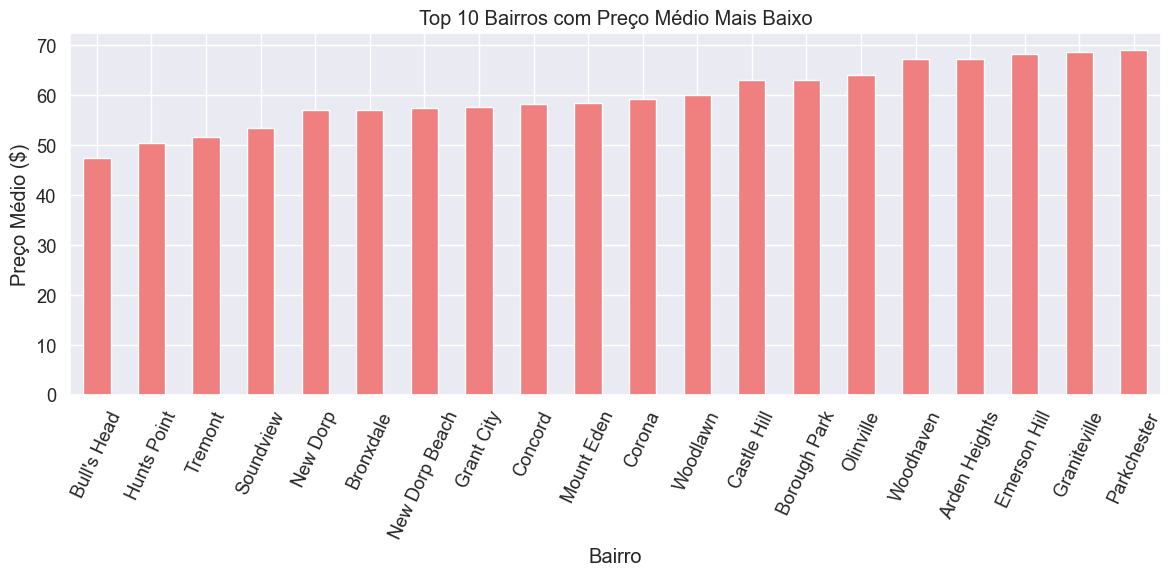

In [44]:
# Top 10 bairros mais baratos
top_bairros_baratos = media_preco_bairro.head(20)  # Os primeiros valores (mais baratos)

plt.figure(figsize=(12, 6))
top_bairros_baratos.plot(kind='bar', color='lightcoral')
plt.title("Top 10 Bairros com Preço Médio Mais Baixo")
plt.ylabel("Preço Médio ($)")
plt.xlabel("Bairro")
plt.xticks(rotation=65)
plt.show()


# **Relatório das Análises Estatísticas**

## 1. Principais Hipóteses de negócio.

**- Localização impacta significativamente o preço dos anúncios:**

Imóveis localizados em Manhattan têm preços mais altos devido à centralidade e proximidade de atrações turísticas.
Bairros periféricos como Bronx e Staten Island tendem a ter preços mais baixos.

**- Número de avaliações está relacionado ao preço e à qualidade percebida:**

Anúncios com mais avaliações podem sugerir alta rotatividade e preços competitivos.
Imóveis com preços altos tendem a ter menos avaliações (público mais seletivo).

**- Brooklyn possui os Shared Rooms mais baratos de NY:**

O Brooklyn, apesar de possuir imoveis de alto padrão e ter valor médio alto, seus bairros mais acessíveis como Bushwick e Bedford-Stuyvesant, possuem muitos Shared Rooms, uma quantidade acima da media, com valores abaixo da media, puxando o valor pra baixo.

In [45]:
shared_rooms_brooklyn = df[(df['bairro_group'] == 'Brooklyn') & (df['room_type'] == 'Shared room')]
print(shared_rooms_brooklyn['bairro'].value_counts())
shared_rooms_total = df[df['room_type'] == 'Shared room']
proporcao_brooklyn = len(shared_rooms_brooklyn) / len(shared_rooms_total)
print(f"Proporção de Shared Rooms em Brooklyn: {proporcao_brooklyn * 100:.2f}%")

preco_brooklyn_bairro = shared_rooms_brooklyn.groupby('bairro')['price'].mean().sort_values(ascending=False)
print(preco_brooklyn_bairro)

bairro
Bedford-Stuyvesant           85
Bushwick                     68
Williamsburg                 32
Crown Heights                25
East Flatbush                24
Flatbush                     21
Sheepshead Bay               19
Greenpoint                   17
Borough Park                 16
Gravesend                    14
Prospect-Lefferts Gardens    12
Clinton Hill                  9
Fort Greene                   8
Brighton Beach                7
Midwood                       7
Cypress Hills                 7
Bay Ridge                     6
Sunset Park                   5
East New York                 5
Kensington                    4
Coney Island                  4
Red Hook                      3
Fort Hamilton                 3
Gowanus                       2
Bensonhurst                   2
Flatlands                     2
Boerum Hill                   1
Park Slope                    1
Vinegar Hill                  1
Canarsie                      1
South Slope                   1
D

## 2. a) Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?

A região de **Staten Island** possui valores intermediários de aluguel, um pouco menos imóveis do que seus rivais **Manhattan** e **Brooklyn** (muito caros), e apresenta características interessantes, como:
- Ser a região com **maior disponibilidade de imóveis por ano** (menor concorrência).
- Ter o **maior número de reviews** dentre todas as regiões de Nova York.

Isso indica um local com **alta rotatividade** e preços médios, tornando **Staten Island** uma boa escolha para investimento.

### Análise Ampla e Direta:
- **Alto Capital:** 
  - **Manhattan** ou **Dumbo (Brooklyn)**.
  - Indicado para investidores com maior capacidade financeira, focando em hóspedes de alto poder aquisitivo e em áreas de alta demanda.

- **Médio Capital:**
  - **Williamsburg (Brooklyn)** ou **Long Island City (Queens)**.
  - Oferece uma boa relação entre custo inicial e retorno, com alta demanda turística e crescimento contínuo.

- **Baixo Capital:**
  - **Bushwick (Brooklyn)** ou **Bedford-Stuyvesant (Brooklyn)**.
  - Ideal para quem busca menor investimento inicial e está disposto a aguardar por retornos de médio a longo prazo.

### Conclusão:
A escolha do local depende diretamente do perfil do investidor e do capital disponível. Staten Island, com sua **alta rotatividade** e **preços intermediários**, é uma alternativa interessante, especialmente para quem busca menor concorrência e bom fluxo de hóspedes.


In [46]:
#Os melhores bairros pra cada métrica
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
mean_values = df.groupby('bairro_group')[numeric_columns].mean()
highest_means = mean_values.idxmax()

highest_mean_list = highest_means.to_dict()

print(highest_mean_list)

{'id': 'Bronx', 'host_id': 'Bronx', 'latitude': 'Bronx', 'longitude': 'Queens', 'price': 'Manhattan', 'minimo_noites': 'Manhattan', 'numero_de_reviews': 'Staten Island', 'reviews_por_mes': 'Staten Island', 'calculado_host_listings_count': 'Manhattan', 'disponibilidade_365': 'Staten Island', 'rent_burden': 'Bronx', 'evictions': 'Brooklyn', 'luxury_indicator': 'Manhattan', 'occupancy_rate': 'Staten Island', 'population_density': 'Manhattan', 'distance_to_manhattan_center': 'Staten Island', 'density_availability': 'Manhattan', 'density_luxury': 'Manhattan', 'density_proximity': 'Manhattan'}


## b) O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?

Com base nos resultados da matriz de correlação:

| Variável                  | Correlação com Preço |
|---------------------------|----------------------|
| **Número mínimo de noites (`minimo_de_noites`)** | 0.061                |
| **Disponibilidade ao longo do ano (`disponibilidade_365`)** | 0.082                |

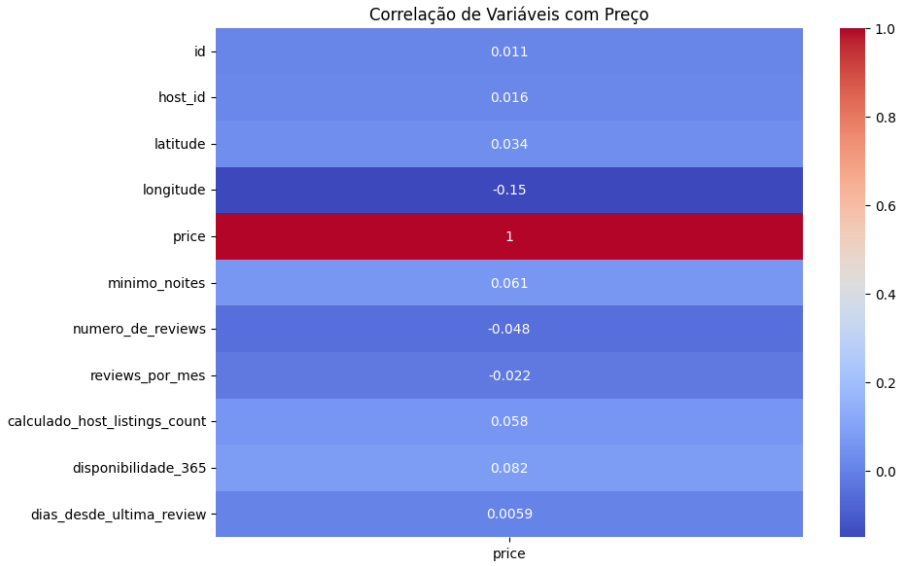

### Análise:
- **Número mínimo de noites (`minimo_de_noites`)** tem uma correlação de **0.061** com o preço.
- **Disponibilidade ao longo do ano (`disponibilidade_365`)** tem uma correlação de **0.082** com o preço.

### Conclusão:
Pode se dizer que sim, influencia, dado que, quanto maior os valores das duas variaveis, maior o valor do preço. Porém, esses valores indicam que o **número mínimo de noites** e a **disponibilidade ao longo do ano** interferem **muito pouco no preço**. A relação linear entre essas variáveis e o preço é fraca, sugerindo que esses fatores não desempenham um papel significativo na determinação do valor de aluguel.


## c) Existe algum padrão no texto do nome do local para lugares de mais alto valor?

Sim, ao comparar a média de valores de registros cujo nome contém termos relacionados a alto valor, com outros registros que não contem esses termos, evidencia-se esse padrão **palavras chaves no nome do local para lugares de mais alto valor**

### **Palavras-Chave Mais Comuns em Imóveis de Alto Valor:**
Exemplo de palavras frequentemente encontradas nos títulos de anúncios de alto valor:
- **"Luxury"**
- **"beautifull"**
- **"center"**

In [47]:
#Criar variável para indicar se o nome do imóvel contém a palavra "luxury" e como isso afeta o preço
df['nome_lower'] = df['nome'].str.lower()
df['luxury'] = df['nome_lower'].str.contains("luxury", na=False).astype(int)
print(df.groupby('luxury')['price'].mean())


luxury
0   148.39
1   271.57
Name: price, dtype: float64


In [48]:
#Criar variável para indicar se o nome do imóvel contém a palavra "beautifull" e como isso afeta o preço
df['beautifull'] = df['nome_lower'].str.contains("beautifull", na=False).astype(int)
print(df.groupby('beautifull')['price'].mean())

beautifull
0   152.70
1   177.43
Name: price, dtype: float64


In [49]:
#Criar variável para indicar se o nome do imóvel contém a palavra "center" e como isso afeta o preço
df['center'] = df['nome_lower'].str.contains("center", na=False).astype(int)
print(df.groupby('center')['price'].mean())

center
0   152.36
1   211.44
Name: price, dtype: float64


# **Pré-processamento dos Dados**


✅ **Tratamento de Valores Ausentes:** 
- Todos os valores ausentes foram previamente identificados e tratados para garantir a integridade dos dados.

✅ **Remoção de Outliers** 
- Outliers das colunas **price** e **minimo_noites** foram removidos para melhor aprendizagem do modelo.

✅ **Transformação de Variáveis Categóricas:** 
As variáveis categóricas relevantes foram convertidas para formatos numéricos utilizando:
- **One-Hot Encoding** para variáveis com poucas categorias, como `bairro_group` e `room_type`.

❌ **Normalização ou Escalonamento de Variáveis:** 
Optei por não escalonar as variáveis, devido a uma falha de conversao entre o One Hot Encoding, e os algoritmos de escalonamento, 
ao não lidar bem com colunas binarias e colunas com muitas variações simultaneamente. Não fez diferença nos testes com o modelo e suas respectivas
acurácias.

Removendo Outliers

In [50]:
#lista de colunas para aplicar o filtro
colunas = [
    'price',
    'minimo_noites',
]

#aplicar o filtro para cada coluna
for coluna in colunas:
    limite_superior = df[coluna].quantile(0.95)  # 95º percentil
    limite_inferior = df[coluna].quantile(0.05)  # 5º percentil
    # Filtrar os dados
    df = df[(df[coluna] >= limite_inferior) & (df[coluna] <= limite_superior)]

print("Dados filtrados:")
print(df['bairro_group'].value_counts())


Dados filtrados:
bairro_group
Manhattan        19220
Brooklyn         18265
Queens            5056
Bronx              904
Staten Island      312
Name: count, dtype: int64


In [51]:
# Retirar as featues desencessarias para o Modelo
columns_to_drop = ['nome','host_name', 'nome_lower','id','host_id','ultima_review','luxury','beautifull','center','bairro']
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]
df.drop(columns=existing_columns_to_drop, inplace=True)

Encoder de variaveis categoricas

In [52]:
from sklearn.preprocessing import LabelEncoder

# Transformar variáveis categóricas em numéricas
df = pd.get_dummies(df, columns=['bairro_group', 'room_type'])
# label_encoder = LabelEncoder()
# df['bairro_group_encoded'] = label_encoder.fit_transform(df['bairro_group'])
# df['room_type_encoded'] = label_encoder.fit_transform(df['room_type'])


In [53]:
df.head()

,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,rent_burden,evictions,luxury_indicator,occupancy_rate,population_density,distance_to_manhattan_center,density_availability,density_luxury,density_proximity,bairro_group_Bronx,bairro_group_Brooklyn,bairro_group_Manhattan,bairro_group_Queens,bairro_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,40.75,-73.98,225,1,45,0.38,2,355,43.60,406.00,1,0.97,28.87,0.60,10249.56,28.87,48.36,False,False,True,False,False,True,False,False
1,40.81,-73.94,150,3,0,0.00,1,365,43.60,406.00,0,1.00,28.87,6.66,10538.28,0.00,4.34,False,False,True,False,False,False,True,False
2,40.69,-73.96,89,1,270,4.64,1,194,50.10,899.00,1,0.53,15.23,8.47,2954.04,15.23,1.80,False,True,False,False,False,True,False,False
3,40.80,-73.94,80,10,9,0.10,1,0,43.60,406.00,1,0.00,28.87,5.60,0.00,28.87,5.15,False,False,True,False,False,True,False,False
4,40.75,-73.97,200,3,74,0.59,1,129,43.60,406.00,1,0.35,28.87,1.51,3724.49,28.87,19.10,False,False,True,False,False,True,False,False


Normalização ou escalonamento de variáveis (Possível usar, mas não encaixou bem com o modelo e as features)

In [54]:
# Normalizar as variáveis numéricas
# num_cols = [col for col in df.columns if df[col].dtypes != "O"] 
# num_cols = [col for col in num_cols if col not in ["price"]]

In [55]:
# from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

#scaler = RobustScaler()
#df[num_cols] = scaler.fit_transform(df[num_cols])

# **Treinamento do Modelo**:

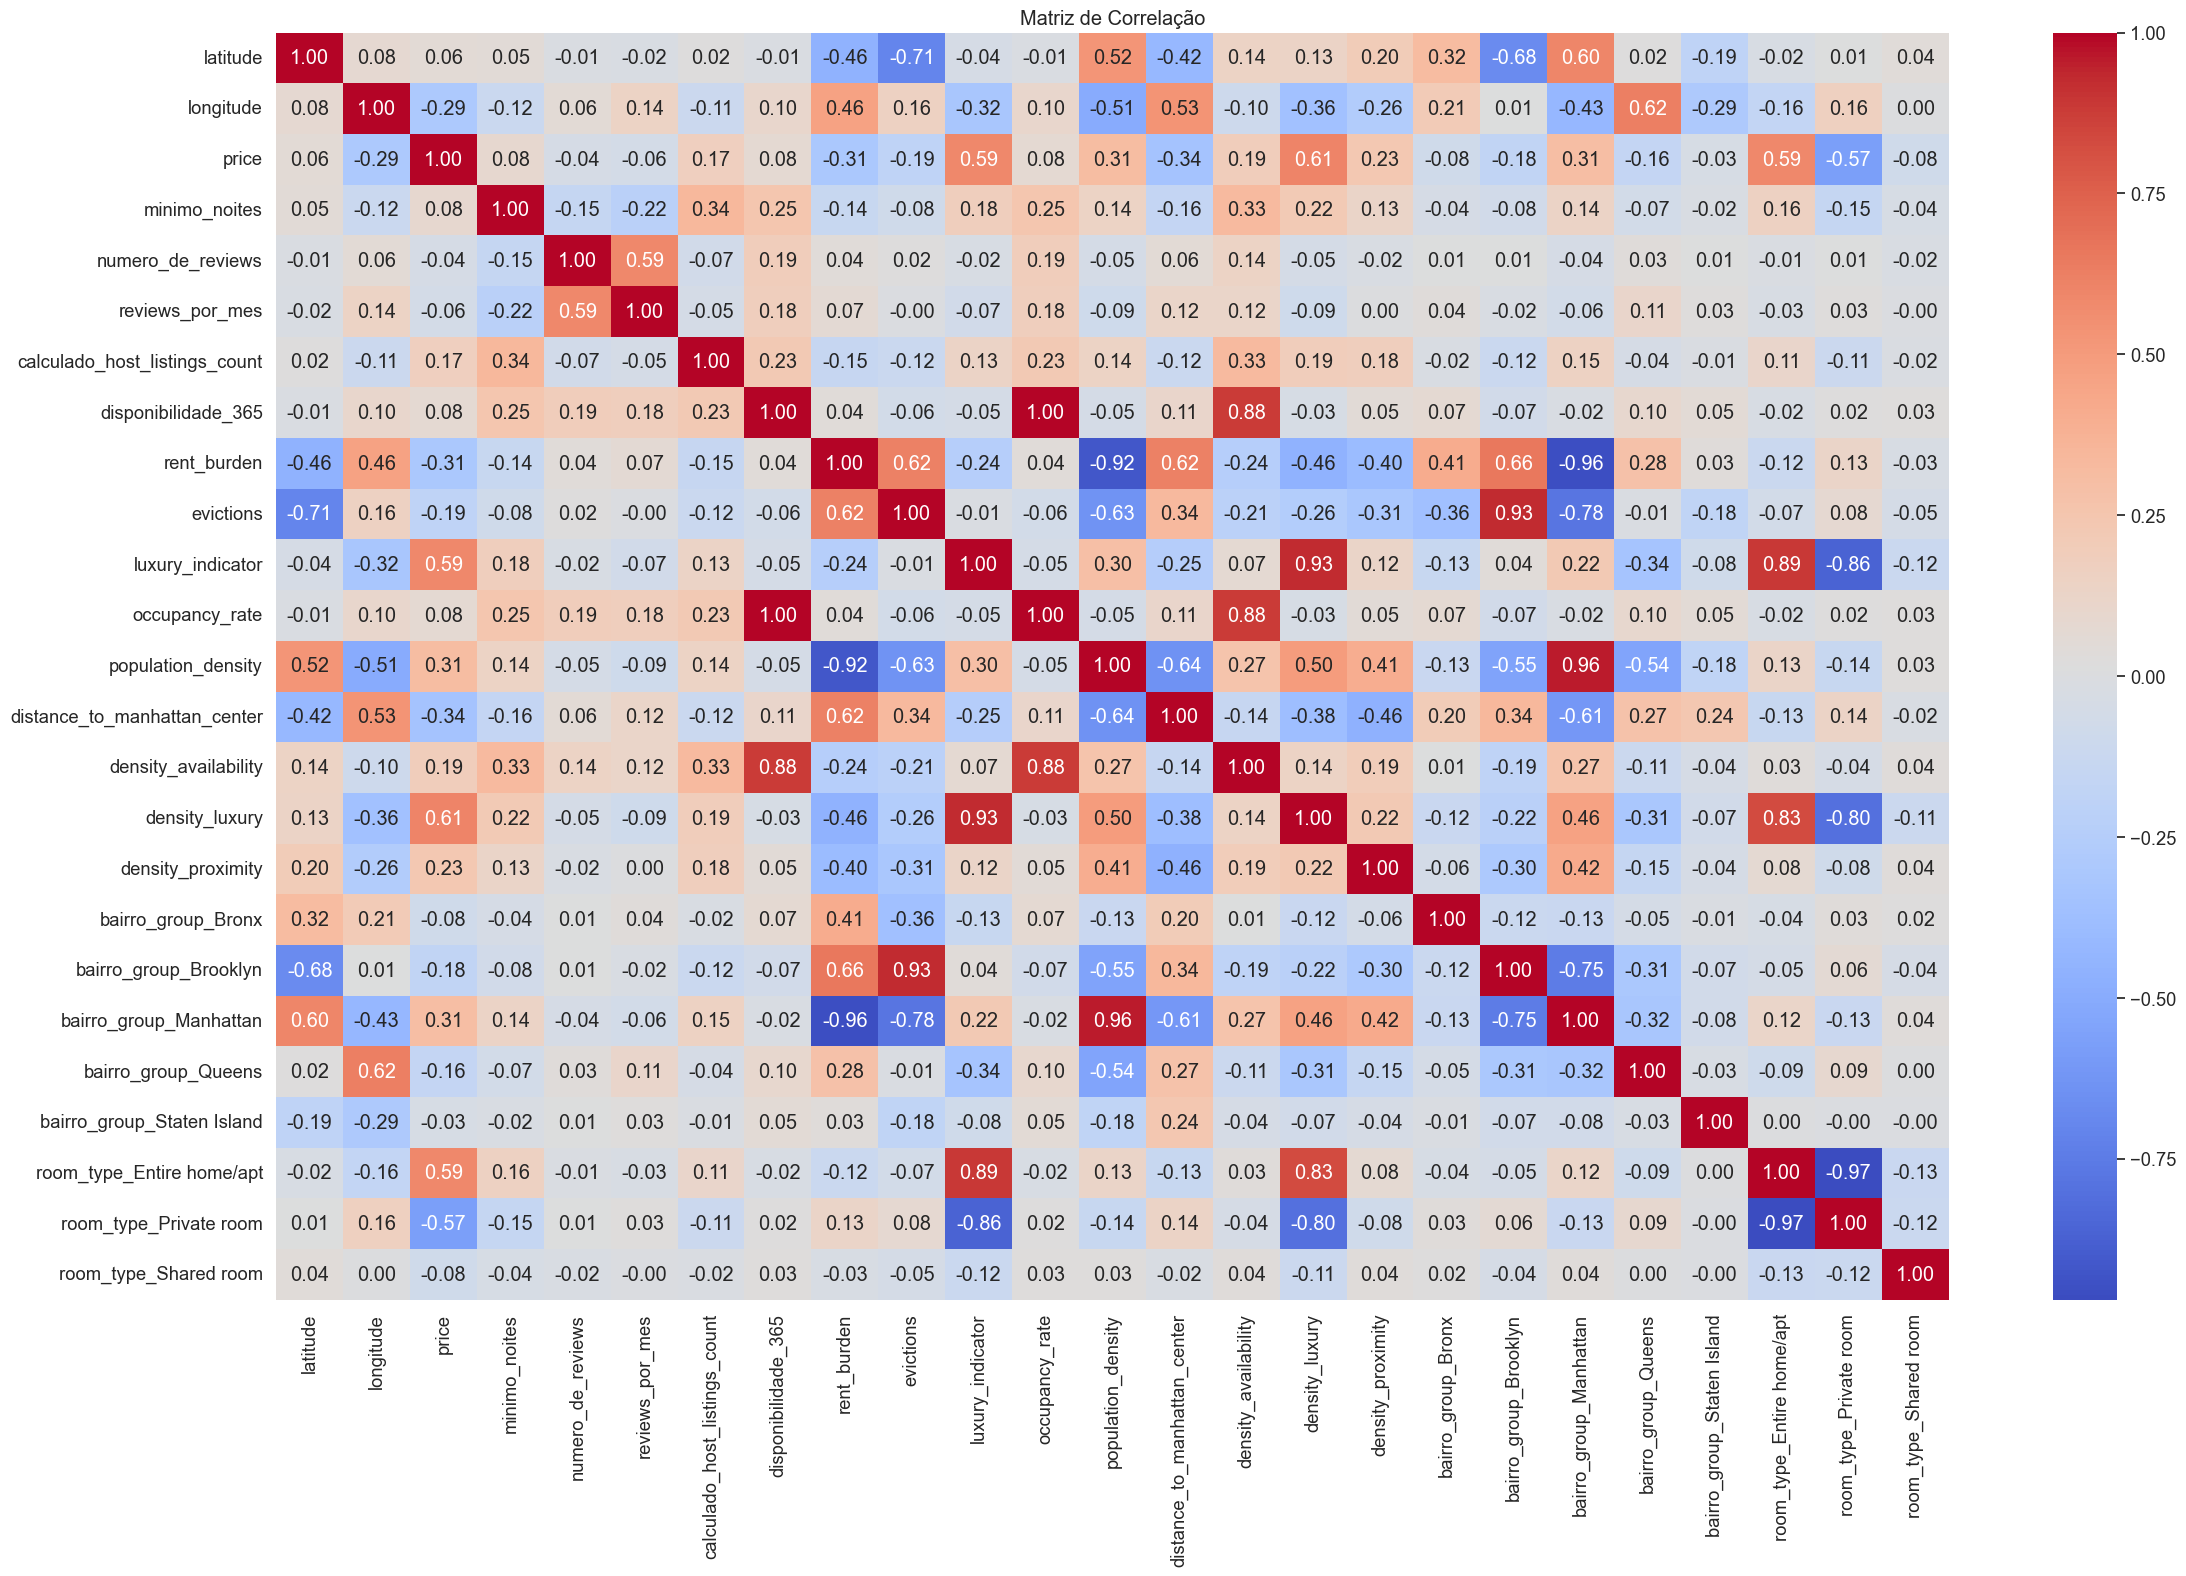

In [56]:
#matriz de correlação atualizada
sns.set_theme(font_scale=1.2) 
plt.figure(figsize=(24, 16))  

numeric_df = df.select_dtypes(include=['int64', 'float64', 'bool'])

sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()


In [57]:
# correlações com a variável target
correlations_with_price = df.corr()['price'].sort_values(ascending=False)
print(correlations_with_price)



price                            1.00
density_luxury                   0.61
room_type_Entire home/apt        0.59
luxury_indicator                 0.59
population_density               0.31
bairro_group_Manhattan           0.31
density_proximity                0.23
density_availability             0.19
calculado_host_listings_count    0.17
minimo_noites                    0.08
occupancy_rate                   0.08
disponibilidade_365              0.08
latitude                         0.06
bairro_group_Staten Island      -0.03
numero_de_reviews               -0.04
reviews_por_mes                 -0.06
room_type_Shared room           -0.08
bairro_group_Bronx              -0.08
bairro_group_Queens             -0.16
bairro_group_Brooklyn           -0.18
evictions                       -0.19
longitude                       -0.29
rent_burden                     -0.31
distance_to_manhattan_center    -0.34
room_type_Private room          -0.57
Name: price, dtype: float64


In [58]:
# variável alvo
y = df['price']

In [59]:
# variáveis preditoras
x = df.drop(columns=['price'])

In [60]:
x.head()

,latitude,longitude,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,rent_burden,evictions,luxury_indicator,occupancy_rate,population_density,distance_to_manhattan_center,density_availability,density_luxury,density_proximity,bairro_group_Bronx,bairro_group_Brooklyn,bairro_group_Manhattan,bairro_group_Queens,bairro_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,40.75,-73.98,1,45,0.38,2,355,43.60,406.00,1,0.97,28.87,0.60,10249.56,28.87,48.36,False,False,True,False,False,True,False,False
1,40.81,-73.94,3,0,0.00,1,365,43.60,406.00,0,1.00,28.87,6.66,10538.28,0.00,4.34,False,False,True,False,False,False,True,False
2,40.69,-73.96,1,270,4.64,1,194,50.10,899.00,1,0.53,15.23,8.47,2954.04,15.23,1.80,False,True,False,False,False,True,False,False
3,40.80,-73.94,10,9,0.10,1,0,43.60,406.00,1,0.00,28.87,5.60,0.00,28.87,5.15,False,False,True,False,False,True,False,False
4,40.75,-73.97,3,74,0.59,1,129,43.60,406.00,1,0.35,28.87,1.51,3724.49,28.87,19.10,False,False,True,False,False,True,False,False


In [61]:
from sklearn.model_selection import train_test_split

# dados de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# tamanho dos conjuntos de treino e teste
print(f"Tamanho do conjunto de treino: {x_train.shape}")
print(f"Tamanho do conjunto de teste: {x_test.shape}")


Tamanho do conjunto de treino: (35005, 24)
Tamanho do conjunto de teste: (8752, 24)


**Regresão Linear**


In [62]:
from sklearn.linear_model import LinearRegression

# regressão linear
model = LinearRegression()

# treinar o modelo
model.fit(x_train, y_train)

# coeficientes
print("Intercepto:", model.intercept_)
print("Coeficientes:", model.coef_)


Intercepto: 4625.316325619864
Coeficientes: [-2.02670298e+02 -4.99040862e+01 -1.17919374e+00 -7.16669728e-02
 -1.19643741e+00  1.05023401e-01  5.36639555e-02  1.21112579e+00
 -2.24321081e-02  1.68356759e+01  1.47024535e-04  1.13082567e+00
 -3.54169591e+00  1.30382631e-03  3.26768478e-02  1.64898573e-01
  2.95135797e-01 -6.35847654e+00  9.85385797e-01  9.32462365e+00
 -4.24666870e+00  4.62298636e+01 -1.55745216e+01 -3.06553420e+01]


In [63]:
# previsões
y_pred = model.predict(x_test)

# exibir as previsões
print("Previsões:", y_pred[:8])
print("Valores Reais:", y_test[:8].values)


Previsões: [115.66932053 186.92794745 145.5204119  153.97901792  76.41721962
 207.89117562  69.39878866 164.63365679]
Valores Reais: [100 200  60 200  55 250  65 120]


In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# calculo de métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# exibir as métricas
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


Mean Absolute Error (MAE): 37.26170548974372
Mean Squared Error (MSE): 2624.097216324845
Root Mean Squared Error (RMSE): 51.22594280562189
R² Score: 0.48536791726257833


**Random Forest**

In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train, y_train)

y_pred_rf = rf_model.predict(x_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("MAE com Random Forest:", mae_rf)
print("R² com Random Forest:", r2_rf)
print("Previsões:", y_pred_rf[:8])
print("Valores Reais:", y_test[:8].values)

MAE com Random Forest: 33.86512111517368
R² com Random Forest: 0.5552757666160513
Previsões: [111.48 165.39 116.63 176.06  81.1  257.97  80.15 182.2 ]
Valores Reais: [100 200  60 200  55 250  65 120]


Modelo Salvo

In [66]:
import joblib
joblib.dump(rf_model, "random_forest_model.pkl")


['random_forest_model.pkl']


# **Explicação do Processo de Previsão do Preço**

## Quais variáveis e/ou suas transformações foram utilizadas e por quê?

Durante o desenvolvimento do modelo, utilizamos uma combinação de variáveis originais e derivadas para capturar melhor os fatores que influenciam os preços dos imóveis em Nova York. Aqui estão as principais:

### Variáveis originais:
- **longitude e latitude**: Representam a localização geográfica dos imóveis, essencial para entender a valorização regional.
- **room_type**: Diferencia os tipos de quartos disponíveis (*Entire home/apt*, *Private room*, *Shared room*).
- **bairro_group**: Segmenta as regiões principais (ex.: Manhattan, Brooklyn, etc.).
- **disponibilidade_365**: Indica quantos dias o imóvel está disponível para aluguel no ano.
- **reviews_por_mes** e **numero_de_reviews**: Medem a popularidade e a rotatividade dos imóveis.

### Transformações e variáveis derivadas:
- **density_luxury**: Multiplicação da densidade populacional por um indicador de luxo, destacando áreas premium.
- **distance_to_manhattan**: Calcula a distância geográfica até o centro de Manhattan, uma métrica relevante para preços.
- **rent_burden**: Um indicador socioeconômico baseado na carga financeira por região.

Essas variáveis foram escolhidas porque têm relevância direta ou indireta com o preço, como mostrado em análises de correlação e no contexto econômico da cidade.

---

## Qual tipo de problema estamos resolvendo?

O problema é de **regressão**, pois o objetivo é prever um valor contínuo: o preço de aluguel dos imóveis.

---

## Qual modelo melhor se aproxima dos dados e quais seus prós e contras?

Escolhemos o **Random Forest Regressor** como o modelo principal, após testes com outros algoritmos. Essa escolha foi baseada no desempenho e na capacidade do modelo de lidar com dados tabulares.

### Prós do Random Forest:
- **Robustez**: Lida bem com dados não lineares e relações complexas.
- **Manuseio de variáveis**: Funciona bem com variáveis categóricas (codificadas) e numéricas, sem exigir muito pré-processamento.
- **Redução de overfitting**: Com ajustes adequados, generaliza bem para novos dados.

### Contras do Random Forest:
- **Custo computacional**: É mais lento em comparação com modelos simples.
- **Interpretação**: Apesar de permitir analisar a importância das variáveis, é mais difícil de explicar em detalhes do que uma regressão linear.

### Outros modelos testados:
- **Regressão Linear**: Simples, mas incapaz de capturar relações não lineares entre as variáveis e o preço.

---

## Qual medida de performance foi utilizada e por quê?

Utilizamos as seguintes métricas para avaliar o modelo:

### MAE (*Mean Absolute Error*):
- Mede o erro médio absoluto entre as previsões e os valores reais.
- É fácil de interpretar porque está na mesma escala que o preço.

### MSE (*Mean Squared Error*):
- Penaliza erros maiores, ajudando a identificar grandes desvios.
- Útil para ajustar o modelo em casos de outliers.

### RMSE (*Root Mean Squared Error*):
- É a raiz quadrada do MSE, tornando a métrica mais interpretável.
- Fornece uma noção clara dos desvios médios em relação ao preço real.

### R² Score:
- Mede a proporção da variação no preço explicada pelo modelo.
- Um valor próximo de 1 indica um bom ajuste; valores abaixo de 0.6 sugerem espaço para melhorias.

### Por que utilizamos essas métricas?
Essas métricas fornecem uma visão clara do desempenho do modelo sob diferentes perspectivas:
- O **MAE** mostra o erro médio, enquanto o **RMSE** dá mais peso aos erros maiores.
- O **R²** avalia quão bem o modelo explica a variabilidade nos preços.

# **Teste do modelo**

In [67]:
import pandas as pd
from sklearn.preprocessing import RobustScaler
from geopy.distance import geodesic

# Função para calcular a distância até o centro de Manhattan
def calculate_distance(latitude, longitude):
    manhattan_center = (40.758896, -73.985130)  # Coordenadas da Times Square
    return geodesic((latitude, longitude), manhattan_center).kilometers

# Função para prever o preço de um imóvel
def predict_price(novo_imovel, rf_model, model_columns):

    novo_imovel_df = pd.DataFrame([novo_imovel])

    # variáveis externas
    rent_burden = {
    'Bronx': 57.2,  
    'Brooklyn': 50.1,
    'Manhattan': 43.6,
    'Queens': 50.1,
    'Staten Island': 48.8
}

    evictions = {
    'Bronx': 1.001,  
    'Brooklyn': 899,
    'Manhattan': 406,
    'Queens': 617,
    'Staten Island': 103
}
    
    population_density = {
    'Manhattan': 28.872, 
    'Brooklyn': 15.227,
    'Queens': 8.542,
    'Bronx': 13.482,
    'Staten Island': 3.327
}

    novo_imovel_df['rent_burden'] = novo_imovel_df['bairro_group'].map(rent_burden)
    novo_imovel_df['evictions'] = novo_imovel_df['bairro_group'].map(evictions)
    novo_imovel_df['population_density'] = novo_imovel_df['bairro_group'].map(population_density)

    # variáveis derivadas
    novo_imovel_df['distance_to_manhattan_center'] = novo_imovel_df.apply(
        lambda x: calculate_distance(x['latitude'], x['longitude']), axis=1)
    novo_imovel_df['luxury_indicator'] = 1 if novo_imovel_df['room_type'][0] == 'Entire home/apt' and novo_imovel_df['bairro_group'][0] in ['Manhattan', 'Brooklyn'] else 0
    novo_imovel_df['occupancy_rate'] = novo_imovel_df['disponibilidade_365'] / 365
    novo_imovel_df['density_luxury'] = novo_imovel_df['luxury_indicator'] * novo_imovel_df['population_density']
    novo_imovel_df['density_proximity'] = novo_imovel_df['population_density'] / novo_imovel_df['distance_to_manhattan_center']
    novo_imovel_df['density_availability'] = novo_imovel_df['population_density'] * novo_imovel_df['disponibilidade_365']


    # OneHot Encoding
    novo_imovel_df = pd.get_dummies(novo_imovel_df, columns=['bairro_group', 'room_type'], drop_first=False)

    # Verificar e adicionar colunas ausentes
    for col in model_columns:
        if col not in novo_imovel_df.columns:
            novo_imovel_df[col] = 0 # 0 para as colunas ausentes

    # Reordenar as colunas
    X_novo_imovel = novo_imovel_df[model_columns]

    # Escalonar variáveis numéricas usando o escalonador ajustado previamente
    #X_novo_imovel[num_cols] = scaler.transform(X_novo_imovel[num_cols])

    previsao = rf_model.predict(X_novo_imovel) # Prever o preço do imóvel

    print(X_novo_imovel.head())
    return f"Preço previsto para o imóvel: ${previsao[0]:.2f}"


# Exemplo de uso
novo_imovel = {
    'id': 2595,
    'nome': 'Skylit Midtown Castle',
    'host_id': 2845,
    'host_name': 'Jennifer',
    'bairro_group': 'Manhattan',
    'bairro': 'Midtown',
    'latitude': 40.75362,
    'longitude': -73.98377,
    'room_type': 'Entire home/apt',
    'minimo_noites': 1,
    'numero_de_reviews': 45,
    'ultima_review': '2019-05-21',
    'reviews_por_mes': 0.38,
    'calculado_host_listings_count': 2,
    'disponibilidade_365': 355
}

model_columns = [
    'latitude', 'longitude', 'minimo_noites', 'numero_de_reviews',
    'reviews_por_mes', 'calculado_host_listings_count', 'disponibilidade_365',
    'rent_burden', 'evictions', 'luxury_indicator', 'occupancy_rate',
    'population_density', 'distance_to_manhattan_center',
    'density_availability', 'density_luxury', 'density_proximity',
    'bairro_group_Bronx', 'bairro_group_Brooklyn', 'bairro_group_Manhattan',
    'bairro_group_Queens', 'bairro_group_Staten Island',
    'room_type_Entire home/apt', 'room_type_Private room', 'room_type_Shared room'
]


resultado = predict_price(novo_imovel, rf_model, model_columns)
print(resultado)


   latitude  longitude  minimo_noites  numero_de_reviews  reviews_por_mes  \
0     40.75     -73.98              1                 45             0.38   

   calculado_host_listings_count  disponibilidade_365  rent_burden  evictions  \
0                              2                  355        43.60     406.00   

   luxury_indicator  occupancy_rate  population_density  \
0                 1            0.97               28.87   

   distance_to_manhattan_center  density_availability  density_luxury  \
0                          0.60              10249.56           28.87   

   density_proximity  bairro_group_Bronx  bairro_group_Brooklyn  \
0              48.36                   0                      0   

   bairro_group_Manhattan  bairro_group_Queens  bairro_group_Staten Island  \
0                    True                    0                           0   

   room_type_Entire home/apt  room_type_Private room  room_type_Shared room  
0                       True                  

In [68]:
#media de preco manhattan
df_manhattan = df[(df['bairro_group_Manhattan'] == 1) & (df['minimo_noites'] == 1) & (df['room_type_Entire home/apt'] == 1) & (df['numero_de_reviews'] > 44) & (df['disponibilidade_365'] > 350)
                  & (df['distance_to_manhattan_center']<3)]

df_manhattan['price'].mean()

np.float64(225.0)